# Total and explained variance

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\ACER\Desktop\pyreach\Life Data\train(1).csv')

In [3]:
import numpy as np
paid_mapping = {index: value for index, value in enumerate(np.unique(df['paid']))}

In [4]:
paid_mapping

{0: 'no', 1: 'yes'}

In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['paid'] = label.fit_transform(df['paid'].values)



In [6]:
df['activities'] = label.fit_transform(df['activities'].values)
df['nursery'] = label.fit_transform(df['nursery'].values)
df['higher'] = label.fit_transform(df['higher'].values)
df['internet'] = label.fit_transform(df['internet'].values)
df['schoolsup'] = label.fit_transform(df['schoolsup'].values)
df['famsup'] = label.fit_transform(df['famsup'].values)

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
ohe = OneHotEncoder()
df = pd.get_dummies(df) # using the get dummy variable

In [9]:
df.head()

,S/N,Age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,absences,Score,Gender_F,Gender_M,Location_R,Location_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T
0,1,13,4,4,2,2,0,1,0,0,...,4,22,1,0,0,1,1,0,1,0
1,2,12,1,1,1,2,0,0,1,0,...,2,31,1,0,0,1,1,0,0,1
2,3,10,1,1,1,2,0,1,0,0,...,6,37,1,0,0,1,0,1,0,1
3,4,10,4,2,1,3,0,0,1,0,...,0,42,1,0,0,1,1,0,0,1
4,5,11,3,3,1,2,0,0,1,0,...,0,37,1,0,0,1,1,0,0,1


In [10]:
import warnings
warnings.filterwarnings("ignore")


from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
x_dummy = []

for k in df.keys():
    if k != 'Score':
        x_dummy.append(k)
        
print (x_dummy)
print (len(x_dummy))

['S/N', 'Age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'health', 'absences', 'Gender_F', 'Gender_M', 'Location_R', 'Location_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T']
26


In [12]:
x = df[x_dummy]
y = df['Score']

In [13]:
x.shape, y.shape

((325, 26), (325,))

In [14]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 20, random_state = 0)

In [15]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [16]:
import numpy as np
cov_mat = np.cov(x_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print ('\nEigenvalues \n%s' % eigen_vals)
len(eigen_vals)


Eigenvalues 
[  2.97154866e+00   2.59210599e+00   2.54037383e+00   2.06896153e+00
   1.70306967e+00   1.50387777e+00   2.40655392e-01   1.33738620e+00
   3.50569353e-01   1.16355953e+00   5.22615117e-01   1.08218184e+00
   5.80172162e-01   9.59361113e-01   9.24890744e-01   6.90007398e-01
   7.16532649e-01   7.55776851e-01   8.83477053e-01   8.45928650e-01
   8.21123987e-01   8.31350826e-01  -1.17655223e-16  -1.48685852e-16
   3.13249181e-17  -7.88085671e-25]


26

In [17]:
# plotting a variance explained ratios of the eigenvalues

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

In [18]:
help (sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [19]:
np.cumsum.__doc__

'\n    Return the cumulative sum of the elements along a given axis.\n\n    Parameters\n    ----------\n    a : array_like\n        Input array.\n    axis : int, optional\n        Axis along which the cumulative sum is computed. The default\n        (None) is to compute the cumsum over the flattened array.\n    dtype : dtype, optional\n        Type of the returned array and of the accumulator in which the\n        elements are summed.  If `dtype` is not specified, it defaults\n        to the dtype of `a`, unless `a` has an integer dtype with a\n        precision less than that of the default platform integer.  In\n        that case, the default platform integer is used.\n    out : ndarray, optional\n        Alternative output array in which to place the result. It must\n        have the same shape and buffer length as the expected output\n        but the type will be cast if necessary. See `doc.ufuncs`\n        (Section "Output arguments") for more details.\n\n    Returns\n    -------\

In [20]:
plt.bar(range(1,27), var_exp, alpha = 0.5, align = 'center', 
       label = 'individual explained variance')

plt.step(range(1,27), cum_var_exp, where = 'mid',
         label = 'cumulative explained variance')
plt.ylabel("expalined variance ratio")

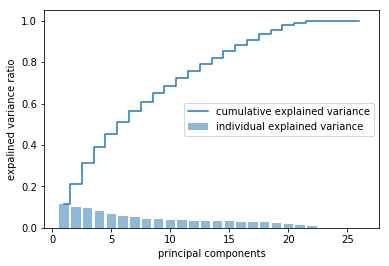

In [21]:
plt.xlabel("principal components")
plt.legend(loc = 'best')
plt.show()

In [22]:
# the resulting plot indicates that the first principal component
# alone accounts for 10 percent of the variance.
# also the first two principal components combined explain almost
# 20 percent of the variance in the data.

# feature transformation

In [23]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse = True)

In [24]:
# next we collect the two eigenvectors that correspond to the two largest
# values to capture about 20 percent of the variance in this dataset.



w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
print ('Matrix W:\n',w)

Matrix W:
 [[ -3.43899172e-01  -5.75167166e-02]
 [ -3.49878717e-01  -4.40686976e-02]
 [  3.52235487e-01   2.78703695e-02]
 [  3.21875206e-01   1.01829224e-04]
 [ -2.07002824e-01   3.41587936e-02]
 [  1.12037304e-01  -1.84307362e-01]
 [ -2.44720224e-01   1.16822341e-01]
 [  8.54654412e-02  -1.22078056e-01]
 [  1.23592378e-01  -1.23034227e-01]
 [  6.46110533e-02   8.38746893e-02]
 [  9.95844907e-02   1.52669927e-01]
 [  1.80676242e-01  -2.98232227e-02]
 [  2.92423745e-01  -8.81647266e-02]
 [  1.65931793e-01   6.22760406e-02]
 [  7.42467145e-02   1.37096617e-01]
 [  6.99324051e-02   2.55916180e-01]
 [  4.31581074e-02   1.46705279e-01]
 [ -1.40701766e-01  -1.25726185e-01]
 [ -4.22215082e-02  -5.30831945e-01]
 [  4.22215082e-02   5.30831945e-01]
 [ -2.88481833e-01  -1.22572467e-02]
 [  2.88481833e-01   1.22572467e-02]
 [ -5.80915444e-02  -1.39327834e-02]
 [  5.80915444e-02   1.39327834e-02]
 [  1.12190519e-01  -3.05281274e-01]
 [ -1.12190519e-01   3.05281274e-01]]


In [25]:
help (np.hstack)

Help on function hstack in module numpy.core.shape_base:

hstack(tup)
    Stack arrays in sequence horizontally (column wise).
    
    Take a sequence of arrays and stack them horizontally to make
    a single array. Rebuild arrays divided by `hsplit`.
    
    This function continues to be supported for backward compatibility, but
    you should prefer ``np.concatenate`` or ``np.stack``. The ``np.stack``
    function was added in NumPy 1.10.
    
    Parameters
    ----------
    tup : sequence of ndarrays
        All arrays must have the same shape along all but the second axis.
    
    Returns
    -------
    stacked : ndarray
        The array formed by stacking the given arrays.
    
    See Also
    --------
    stack : Join a sequence of arrays along a new axis.
    vstack : Stack arrays in sequence vertically (row wise).
    dstack : Stack arrays in sequence depth wise (along third axis).
    concatenate : Join a sequence of arrays along an existing axis.
    hsplit : Split a

In [26]:
help (np.newaxis)

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __repr__(self, /)
 |      Return repr(self).



In [27]:
help (type)

Help on class type in module builtins:

class type(object)
 |  type(object_or_name, bases, dict)
 |  type(object) -> the object's type
 |  type(name, bases, dict) -> a new type
 |  
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __dir__(...)
 |      __dir__() -> list
 |      specialized __dir__ implementation for types
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __instancecheck__(...)
 |      __instancecheck__() -> bool
 |      check if an object is an instance
 |  
 |  __new__(*args, **kwargs)
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __prepare__(...)
 |      __prepare__() -> dict
 |      used to create the namespace for the class statement
 |  
 

In [28]:
help (np.dot)

Help on built-in function dot in module numpy.core.multiarray:

dot(...)
    dot(a, b, out=None)
    
    Dot product of two arrays.
    
    For 2-D arrays it is equivalent to matrix multiplication, and for 1-D
    arrays to inner product of vectors (without complex conjugation). For
    N dimensions it is a sum product over the last axis of `a` and
    the second-to-last of `b`::
    
        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    
    Parameters
    ----------
    a : array_like
        First argument.
    b : array_like
        Second argument.
    out : ndarray, optional
        Output argument. This must have the exact kind that would be returned
        if it was not used. In particular, it must have the right type, must be
        C-contiguous, and its dtype must be the dtype that would be returned
        for `dot(a,b)`. This is a performance feature. Therefore, if these
        conditions are not met, an exception is raised, instead of attempting
        to be flex

In [29]:
np.dot(x_train_std[0],w)

array([ 0.85630344, -2.81102961])

In [30]:
#similarly we can transform the entire dimensional training dataset
#onto the two principal components by calcuating the matrix dot product

x_train_pca = np.dot(x_train_std,w)

In [31]:
help (np.unique)

Help on function unique in module numpy.lib.arraysetops:

unique(ar, return_index=False, return_inverse=False, return_counts=False)
    Find the unique elements of an array.
    
    Returns the sorted unique elements of an array. There are three optional
    outputs in addition to the unique elements: the indices of the input array
    that give the unique values, the indices of the unique array that
    reconstruct the input array, and the number of times each unique value
    comes up in the input array.
    
    Parameters
    ----------
    ar : array_like
        Input array. This will be flattened if it is not already 1-D.
    return_index : bool, optional
        If True, also return the indices of `ar` that result in the unique
        array.
    return_inverse : bool, optional
        If True, also return the indices of the unique array that can be used
        to reconstruct `ar`.
    return_counts : bool, optional
        If True, also return the number of times each unique

In [32]:
np.unique(y_train)
len(np.unique(y_train))

33

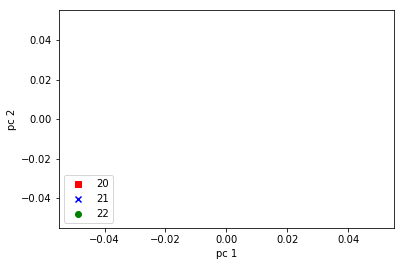

In [33]:
# lastly lets visualize the transformed dataset, in a two-dimensional
# scatterplot

colors = ['r','b','g']
markers = ['s','x','o']

for i, c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train == 1, 0], x_train_pca[y_train== 1,0],c =c,
                label = i, marker = m)

plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.legend(loc = 'lower left')
plt.show()
    

In [34]:
x_train_pca[np.ceil(y_train)== 1, 0]

array([], dtype=float64)

In [35]:
x_train_pca[1, 0]

-0.41659438456617581

In [36]:
x_train_pca[y_train ==1, 0]

array([], dtype=float64)

# principal component analysis in scikit-learn

In [37]:
from matplotlib.colors import ListedColormap

In [84]:
def plot_decision_regions(x, y, classifier, resolution = 0.02):
    
    # setup marker generator and color map
    marker = ['s','x','o','^','v']
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max =x[:,0].min() -1, x[:,0].max()+1
    x2_min, x2_max = x[:,1].min()-1, x[:,1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(
    x2_min,x2_max,resolution))
    
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x = x[y== c1, 0], y= x[y==c1,1], alpha = 0.8, c = cmap(idx),
                   marker = marker[idx], label = c1)

In [39]:
from sklearn.linear_model import LinearRegression 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
lr = LinearRegression()
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.fit_transform(x_test_std)

In [40]:
lr.fit(x_train_pca, x_train)
plot_decision_regions(x_train_pca, y_train, classifier = lr)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc = 'lower left')
plt.show()

ValueError: cannot reshape array of size 6693700 into shape (475,542)

In [41]:
help (np.reshape)

Help on function reshape in module numpy.core.fromnumeric:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the firs

In [42]:
y = np.array([1,2,3,5,6,67,44,3,2,5,7])
cmap = ListedColormap(colors[:len(np.unique(y))])

In [43]:
print (colors[:8])
ListedColormap(colors[:8])

['r', 'b', 'g']


In [44]:
help (np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [45]:
help (np.meshgrid)

Help on function meshgrid in module numpy.lib.function_base:

meshgrid(*xi, **kwargs)
    Return coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.
    
        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default is True.  P

In [46]:
help (np.ravel)

Help on function ravel in module numpy.core.fromnumeric:

ravel(a, order='C')
    Return a contiguous flattened array.
    
    A 1-D array, containing the elements of the input, is returned.  A copy is
    made only if needed.
    
    As of NumPy 1.10, the returned array will have the same type as the input
    array. (for example, a masked array will be returned for a masked array
    input)
    
    Parameters
    ----------
    a : array_like
        Input array.  The elements in `a` are read in the order specified by
        `order`, and packed as a 1-D array.
    order : {'C','F', 'A', 'K'}, optional
    
        The elements of `a` are read using this index order. 'C' means
        to index the elements in row-major, C-style order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest.  'F' means to index the elements
        in column-major, Fortran-style order, with the
        first index changing fastest, and the last index

In [47]:
help (plt.contourf)

Help on function contourf in module matplotlib.pyplot:

contourf(*args, **kwargs)
    Plot contours.
    
    :func:`~matplotlib.pyplot.contour` and
    :func:`~matplotlib.pyplot.contourf` draw contour lines and
    filled contours, respectively.  Except as noted, function
    signatures and return values are the same for both versions.
    
    :func:`~matplotlib.pyplot.contourf` differs from the MATLAB
    version in that it does not draw the polygon edges.
    To draw edges, add line contours with
    calls to :func:`~matplotlib.pyplot.contour`.
    
    
    Call signatures::
    
      contour(Z)
    
    make a contour plot of an array *Z*. The level values are chosen
    automatically.
    
    ::
    
      contour(X,Y,Z)
    
    *X*, *Y* specify the (x, y) coordinates of the surface
    
    ::
    
      contour(Z,N)
      contour(X,Y,Z,N)
    
    contour up to *N* automatically-chosen levels.
    
    ::
    
      contour(Z,V)
      contour(X,Y,Z,V)
    
    draw contour 

# supervised data compression via linear discrimnant analysis (LDA)

In [48]:
np.set_printoptions(precision = 4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(x_train_std[y_train == label], axis = 0))
    
    print ('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]

MV 2: [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]

MV 3: [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]



# computing the scatter matrix

In [49]:
d = 26 # number of features
s_w = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in x[y == label]:
        row , mv= row.reshape(d,1),mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    s_w += class_scatter
    
print ('within-class scatter matrix: %sx%s' % (s_w.shape[0], s_w.shape[1]))

ValueError: Item wrong length 11 instead of 325.

In [69]:
import numpy as np

In [70]:
d = 26 # number of features
s_w = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = mv.cov(x_train_std[y_train == label].T)
    s_w += class_scatter
    
print ('Scaled within-class scatter matrix: %s%s' % (s_w.shape[0], s_w.shape[1]))

AttributeError: 'numpy.ndarray' object has no attribute 'cov'

In [71]:
mean_overall = np.mean(x_train_std, axis = 0)
d = 26 # number of features
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n = x[y == i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
S_B+= n * (mean_vec - mean_overall).dot(mean_vec-mean_overall).T
print ("Between-class scatter matrix: %s%s" %(S_B.shape[0],S_B.shape[1]))

TypeError: unhashable type: 'numpy.ndarray'

# selecting linear discriminants for the new feature subspace

In [75]:
s_w = np.zeros((d,d))
eigen_vals, eigen_vecs = np.linalg.eig(np.dot(np.linalg.inv(s_w),S_B))

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs, key = lambda k:k[0], reverse = True)
print ("Eigenvalues in decreasing order:\n")
for eigen_val in eigen_pairs:
    print (eigen_val[0])

LinAlgError: Singular matrix

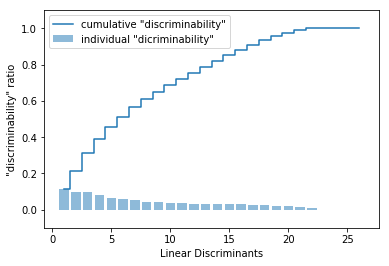

In [76]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,27), discr, alpha = 0.5, align = 'center', 
       label = 'individual "dicriminability"')

plt.step(range(1,27), cum_discr, where = 'mid', label = 'cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc = 'best')
plt.show()

In [77]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print ('Matrix W:\n', w)

Matrix W:
 [[ -3.4390e-01  -5.7517e-02]
 [ -3.4988e-01  -4.4069e-02]
 [  3.5224e-01   2.7870e-02]
 [  3.2188e-01   1.0183e-04]
 [ -2.0700e-01   3.4159e-02]
 [  1.1204e-01  -1.8431e-01]
 [ -2.4472e-01   1.1682e-01]
 [  8.5465e-02  -1.2208e-01]
 [  1.2359e-01  -1.2303e-01]
 [  6.4611e-02   8.3875e-02]
 [  9.9584e-02   1.5267e-01]
 [  1.8068e-01  -2.9823e-02]
 [  2.9242e-01  -8.8165e-02]
 [  1.6593e-01   6.2276e-02]
 [  7.4247e-02   1.3710e-01]
 [  6.9932e-02   2.5592e-01]
 [  4.3158e-02   1.4671e-01]
 [ -1.4070e-01  -1.2573e-01]
 [ -4.2222e-02  -5.3083e-01]
 [  4.2222e-02   5.3083e-01]
 [ -2.8848e-01  -1.2257e-02]
 [  2.8848e-01   1.2257e-02]
 [ -5.8092e-02  -1.3933e-02]
 [  5.8092e-02   1.3933e-02]
 [  1.1219e-01  -3.0528e-01]
 [ -1.1219e-01   3.0528e-01]]


# projecting samples onto the new feature space

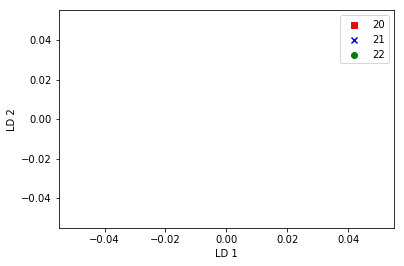

In [78]:
x_train_lda = np.dot(x_train_std,w)
colors = ['r','b','g']
markers = ['s','x','o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_lda[y_train == 1, 0], x_train_lda[y_train == 1,1], c = c,
               label = l, marker = m)
    
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'upper right')
plt.show()

# LDA via scikit-learn

In [85]:
from sklearn.lda import LDA
lda = LDA(n_components = 2)
x_train_lda = lda.fit_transform(x_train_std, y_train)

lr = LinearRegression()
lr = lr.fit(x_train_lda, y_train)
plot_decision_regions(x_train_lda, y_train, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.show()

IndexError: list index out of range

In [87]:
x_test_lda = lda.transform(x_test_std)
plot_decision_regions(x_test_lda, y_test, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.show()

IndexError: list index out of range

# using kernel principal component analysis for nonlinear mappping

In [86]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [90]:
def rbf_kernel_pca(x, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    -------------
    X: {Numpy ndarray}, shape = [n_samples, n_features]
    
    gamma = float
        Tunning paramter components to return
        
    Returns
    ----------------
    X_pc: {Numpy ndarray}, shape = [n_samples, k_features]
        Projected dataset
        """
    # calculate pairwise squared Euclidean distances
    # in the M * N dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    
    # convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N)) /N
    K = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(np.dot(one_n,K),one_n)
    
    # obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # collect the top K eigenvectors (projected samples)
    X_pc = np.column_stack((eignvecs[:, -i] for i in range(1, n_components +1)))
    
    return X_pc